In [3]:
import matplotlib.pyplot as plt
import matplotlib.axes as axes
import numpy as np
import networkx as nx

from qiskit import Aer
from qiskit.tools.visualization import plot_histogram
from qiskit.circuit.library import TwoLocal
from qiskit_optimization.applications import Maxcut, Tsp
from qiskit.algorithms import VQE, NumPyMinimumEigensolver
from qiskit.algorithms.optimizers import SPSA
from qiskit.utils import algorithm_globals, QuantumInstance
from qiskit_optimization.algorithms import MinimumEigenOptimizer
from qiskit_optimization.problems import QuadraticProgram

## Solving Currency Arbitrage problem using TSP. 
## In TSP, we do find the the minimum route a salesman should travel. 
## So in Currency Arbitrage pproblem, we can define it as a maximization problem. 
## Currency can be considered as a city, and value can be considered as a distance between cities. 
## Hence, we can maximize the traversal of currencies, to ge the maximum profit out of transactions. 

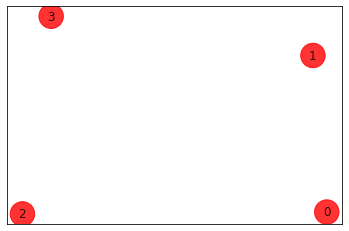

In [7]:
n = 4
G = nx.Graph()
G.add_nodes_from(np.arange(0, n, 1))
# elist = [(0, 1, 1.0), (0, 2, 1.0), (0, 3, 1.0), (1, 2, 1.0), (2, 3, 1.0)]
# tuple is (i,j,weight) where (i,j) is the edge
# G.add_weighted_edges_from(elist)

colors = ["r" for node in G.nodes()]
pos = nx.spring_layout(G)


def draw_graph(G, colors, pos):
    default_axes = plt.axes(frameon=True)
    nx.draw_networkx(G, node_color=colors, node_size=600, alpha=0.8, ax=default_axes, pos=pos)
    edge_labels = nx.get_edge_attributes(G, "weight")
    nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=edge_labels)


draw_graph(G, colors, pos)

In [5]:
# solving Quadratic Program using exact classical eigensolver
exact = MinimumEigenOptimizer(NumPyMinimumEigensolver())

### TSP

distance
 [[ 0. 48. 91. 33.]
 [48.  0. 63. 71.]
 [91. 63.  0. 92.]
 [33. 71. 92.  0.]]


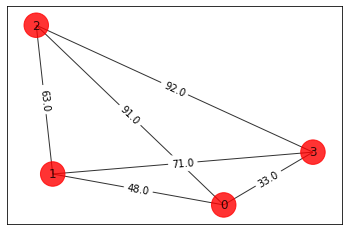

In [6]:
n = n
num_qubits = n**2
tsp = Tsp.create_random_instance(n, seed=123)
adj_matrix = nx.to_numpy_matrix(tsp.graph)
print("distance\n", adj_matrix)

colors = ["r" for node in tsp.graph.nodes]
pos = [tsp.graph.nodes[node]["pos"] for node in tsp.graph.nodes]
draw_graph(tsp.graph, colors, pos)

order = (0, 1, 2, 3) Distance = 236.0
Best order from brute force = (0, 1, 2, 3) with total distance = 236.0


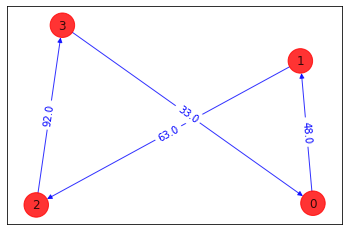

In [8]:
from itertools import permutations


def brute_force_tsp(w, N):
    a = list(permutations(range(1, N)))
    last_best_distance = 1e10
    for i in a:
        distance = 0
        pre_j = 0
        for j in i:
            distance = distance + w[j, pre_j]
            pre_j = j
        distance = distance + w[pre_j, 0]
        order = (0,) + i
        if distance < last_best_distance:
            best_order = order
            last_best_distance = distance
            print("order = " + str(order) + " Distance = " + str(distance))
    return last_best_distance, best_order


best_distance, best_order = brute_force_tsp(adj_matrix, n)
print(
    "Best order from brute force = "
    + str(best_order)
    + " with total distance = "
    + str(best_distance)
)


def draw_tsp_solution(G, order, colors, pos):
    G2 = nx.DiGraph()
    G2.add_nodes_from(G)
    n = len(order)
    for i in range(n):
        j = (i + 1) % n
        G2.add_edge(order[i], order[j], weight=G[order[i]][order[j]]["weight"])
    default_axes = plt.axes(frameon=True)
    nx.draw_networkx(
        G2, node_color=colors, edge_color="b", node_size=600, alpha=0.8, ax=default_axes, pos=pos
    )
    edge_labels = nx.get_edge_attributes(G2, "weight")
    nx.draw_networkx_edge_labels(G2, pos, font_color="b", edge_labels=edge_labels)


draw_tsp_solution(tsp.graph, best_order, colors, pos)

In [9]:
qp = tsp.to_quadratic_program()
print(qp)
# print(qp.export_as_lp_string())

\ This file has been generated by DOcplex
\ ENCODING=ISO-8859-1
\Problem name: TSP

Minimize
 obj: [ 96 x_0_0*x_1_1 + 96 x_0_0*x_1_3 + 182 x_0_0*x_2_1 + 182 x_0_0*x_2_3
      + 66 x_0_0*x_3_1 + 66 x_0_0*x_3_3 + 96 x_0_1*x_1_0 + 96 x_0_1*x_1_2
      + 182 x_0_1*x_2_0 + 182 x_0_1*x_2_2 + 66 x_0_1*x_3_0 + 66 x_0_1*x_3_2
      + 96 x_0_2*x_1_1 + 96 x_0_2*x_1_3 + 182 x_0_2*x_2_1 + 182 x_0_2*x_2_3
      + 66 x_0_2*x_3_1 + 66 x_0_2*x_3_3 + 96 x_0_3*x_1_0 + 96 x_0_3*x_1_2
      + 182 x_0_3*x_2_0 + 182 x_0_3*x_2_2 + 66 x_0_3*x_3_0 + 66 x_0_3*x_3_2
      + 126 x_1_0*x_2_1 + 126 x_1_0*x_2_3 + 142 x_1_0*x_3_1 + 142 x_1_0*x_3_3
      + 126 x_1_1*x_2_0 + 126 x_1_1*x_2_2 + 142 x_1_1*x_3_0 + 142 x_1_1*x_3_2
      + 126 x_1_2*x_2_1 + 126 x_1_2*x_2_3 + 142 x_1_2*x_3_1 + 142 x_1_2*x_3_3
      + 126 x_1_3*x_2_0 + 126 x_1_3*x_2_2 + 142 x_1_3*x_3_0 + 142 x_1_3*x_3_2
      + 184 x_2_0*x_3_1 + 184 x_2_0*x_3_3 + 184 x_2_1*x_3_0 + 184 x_2_1*x_3_2
      + 184 x_2_2*x_3_1 + 184 x_2_2*x_3_3 + 184 x_2_3*x_3_0 + 184

In [10]:
from qiskit_optimization.converters import QuadraticProgramToQubo

qp2qubo = QuadraticProgramToQubo()
qubo = qp2qubo.convert(qp)
qubitOp, offsett = qubo.to_ising()
offset = -1*offsett
# qubitOp, offset = -1*qubitOpp, -offsett
print("Offset:", offset)
print("Ising Hamiltonian:")
print(str(qubitOp))

Offset: -51756.0
Ising Hamiltonian:
-6468.0 * ZIIIIIIIIIIIIIII
- 6468.0 * IZIIIIIIIIIIIIII
+ 1592.5 * ZZIIIIIIIIIIIIII
- 6468.0 * IIZIIIIIIIIIIIII
+ 1592.5 * ZIZIIIIIIIIIIIII
+ 1592.5 * IZZIIIIIIIIIIIII
- 6468.0 * IIIZIIIIIIIIIIII
+ 1592.5 * ZIIZIIIIIIIIIIII
+ 1592.5 * IZIZIIIIIIIIIIII
+ 1592.5 * IIZZIIIIIIIIIIII
- 6493.0 * IIIIZIIIIIIIIIII
+ 1592.5 * ZIIIZIIIIIIIIIII
+ 23.0 * IZIIZIIIIIIIIIII
+ 23.0 * IIIZZIIIIIIIIIII
- 6493.0 * IIIIIZIIIIIIIIII
+ 23.0 * ZIIIIZIIIIIIIIII
+ 1592.5 * IZIIIZIIIIIIIIII
+ 23.0 * IIZIIZIIIIIIIIII
+ 1592.5 * IIIIZZIIIIIIIIII
- 6493.0 * IIIIIIZIIIIIIIII
+ 23.0 * IZIIIIZIIIIIIIII
+ 1592.5 * IIZIIIZIIIIIIIII
+ 23.0 * IIIZIIZIIIIIIIII
+ 1592.5 * IIIIZIZIIIIIIIII
+ 1592.5 * IIIIIZZIIIIIIIII
- 6493.0 * IIIIIIIZIIIIIIII
+ 23.0 * ZIIIIIIZIIIIIIII
+ 23.0 * IIZIIIIZIIIIIIII
+ 1592.5 * IIIZIIIZIIIIIIII
+ 1592.5 * IIIIZIIZIIIIIIII
+ 1592.5 * IIIIIZIZIIIIIIII
+ 1592.5 * IIIIIIZZIIIIIIII
- 6461.0 * IIIIIIIIZIIIIIII
+ 1592.5 * ZIIIIIIIZIIIIIII
+ 17.75 * IZIIIIIIZIIIIIII
+ 

In [11]:
result = exact.solve(qubo)
print(result)

optimal function value: 236.0
optimal value: [0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0.]
status: SUCCESS


energy: -51520.0
tsp objective: -103276.0
feasible: True
solution: [1, 2, 3, 0]
solution objective: 236.0


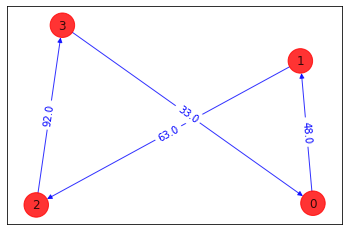

In [12]:
# Making the Hamiltonian in its full form and getting the lowest eigenvalue and eigenvector
ee = NumPyMinimumEigensolver()
result = ee.compute_minimum_eigenvalue(qubitOp)

print("energy:", result.eigenvalue.real)
print("tsp objective:", result.eigenvalue.real + offset)
x = tsp.sample_most_likely(result.eigenstate)
print("feasible:", qubo.is_feasible(x))
z = tsp.interpret(x)
print("solution:", z)
print("solution objective:", tsp.tsp_value(z, adj_matrix))
draw_tsp_solution(tsp.graph, z, colors, pos)

In [15]:
algorithm_globals.random_seed = 123
seed = 10598
backend = Aer.get_backend("qasm_simulator")
quantum_instancee = QuantumInstance(backend, seed_simulator=seed, seed_transpiler=seed)
# print(quantum_instance)


energy: -48489.29199218752
time: 377.6635675430298
feasible: True
solution: [3, 1, 0, 2]
solution objective: 302.0


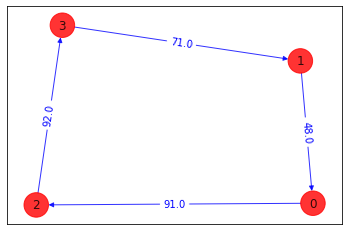

In [17]:
spsa = SPSA(maxiter=300)
ry = TwoLocal(qubitOp.num_qubits, "ry", "cz", reps=5, entanglement="linear")
vqe = VQE(ry, optimizer=spsa, quantum_instance=quantum_instancee)

result = vqe.compute_minimum_eigenvalue(qubitOp)

print("energy:", result.eigenvalue.real)
print("time:", result.optimizer_time)
x = tsp.sample_most_likely(result.eigenstate)
print("feasible:", qubo.is_feasible(x))
z = tsp.interpret(x)
print("solution:", z)
print("solution objective:", tsp.tsp_value(z, adj_matrix))
draw_tsp_solution(tsp.graph, z, colors, pos)

In [18]:
algorithm_globals.random_seed = 123
seed = 10598
backend = Aer.get_backend("qasm_simulator")
quantum_instance = QuantumInstance(backend, seed_simulator=seed, seed_transpiler=seed)

solution: [3, 1, 0, 2]
solution objective: 302.0


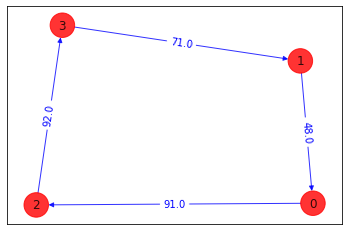

In [20]:
import warnings

warnings.filterwarnings("ignore", category=UserWarning)
vqe_optimizer = MinimumEigenOptimizer(vqe)

# solve quadratic program
result = vqe_optimizer.solve(qp)
# print(result)

z = tsp.interpret(x)
print("solution:", z)
print("solution objective:", tsp.tsp_value(z, adj_matrix))
draw_tsp_solution(tsp.graph, z, colors, pos)